# Retrieving the data

Download it [manually](https://www.kaggle.com/mczielinski/bitcoin-historical-data) or retrieve the data with the API following the [documentation](https://www.kaggle.com/docs/api). The command would be:

`kaggle datasets download -d mczielinski/bitcoin-historical-data`

We have prepared some data that is easier to work with. You can retrieve it on [Github](https://github.com/JesperDramsch/skillshare-financial-prediction/raw/main/data/btc_hourly.csv).




# Data Loading

In [ ]:
import pandas as pd

In [ ]:
btc = pd.read_csv('https://github.com/JesperDramsch/skillshare-financial-prediction/raw/main/data/btc_hourly.csv')
btc['Timestamp'] = pd.to_datetime(btc.Timestamp)
btc.set_index('Timestamp', inplace=True)
btc.head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Describe Data

In [ ]:
btc.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
btc.tail()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-30 20:00:00,58686.619500,58717.499833,58649.440333,58678.720333,1.976271,116009.666363,58682.385127
2021-03-30 21:00:00,58703.792500,58718.812833,58688.192000,58709.001000,0.960084,56335.721540,58705.094588
2021-03-30 22:00:00,58788.743667,58806.029333,58770.925667,58788.207333,1.133653,66663.661684,58788.454429
2021-03-30 23:00:00,58667.730345,58681.061379,58655.068966,58668.632586,1.350504,79205.951112,58666.750127
2021-03-31 00:00:00,58767.750000,58778.180000,58755.970000,58778.180000,2.712831,159417.751000,58764.349363


## Columns/features in data


In [ ]:
btc.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

## Data information


In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81066 entries, 2011-12-31 07:00:00 to 2021-03-31 00:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               77534 non-null  float64
 1   High               77534 non-null  float64
 2   Low                77534 non-null  float64
 3   Close              77534 non-null  float64
 4   Volume_(BTC)       77534 non-null  float64
 5   Volume_(Currency)  77534 non-null  float64
 6   Weighted_Price     77534 non-null  float64
dtypes: float64(7)
memory usage: 4.9 MB


## Is there any missing values?


In [ ]:
btc.isnull().values.any()


True

In [ ]:
btc[btc.isnull().any(axis=1)].head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
btc = btc[btc.index.year>2015].dropna()
btc


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2016-01-01 00:00:00,431.571842,431.683947,431.350526,431.466842,1.087394,469.169648,431.486899
2016-01-01 01:00:00,430.470968,430.612258,430.317742,430.464194,1.006846,433.216050,430.461480
2016-01-01 02:00:00,431.021923,431.075385,430.962308,431.013462,0.471009,202.855008,430.992236
2016-01-01 03:00:00,431.493784,431.681892,431.373243,431.600811,2.026601,876.422114,431.577192
2016-01-01 04:00:00,434.310408,434.438163,434.135306,434.281633,17.771499,7719.402352,434.306570
...,...,...,...,...,...,...,...
2021-03-30 20:00:00,58686.619500,58717.499833,58649.440333,58678.720333,1.976271,116009.666363,58682.385127
2021-03-30 21:00:00,58703.792500,58718.812833,58688.192000,58709.001000,0.960084,56335.721540,58705.094588
2021-03-30 22:00:00,58788.743667,58806.029333,58770.925667,58788.207333,1.133653,66663.661684,58788.454429


In [ ]:
btc.isnull().values.any()

False

## Data Description


In [ ]:
btc.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,45981.000000,45981.000000,45981.000000,45981.000000,45981.000000,4.598100e+04,45981.000000
mean,7896.779379,7902.375884,7890.926469,7896.768154,6.717475,5.316373e+04,7896.671885
std,9587.179188,9595.099166,9579.064379,9587.318156,7.858661,1.010684e+05,9586.880428
min,358.262414,358.673793,357.663276,358.174310,0.017548,5.522772e+01,358.134143
25%,1272.792778,1273.177778,1272.604722,1272.849167,2.323864,6.372295e+03,1272.834702
50%,6525.464898,6528.668085,6522.516863,6525.332041,4.391451,2.158347e+04,6525.162787
75%,9494.180333,9499.169000,9489.318833,9494.198333,8.216645,5.812929e+04,9494.596766
max,61365.363833,61406.334167,61325.110500,61370.448167,228.220477,4.125142e+06,61363.600604


# Statistical Test



In [ ]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
btc["Weighted_Price_log"] = np.log1p(btc.Weighted_Price)

<Figure size 1440x720 with 0 Axes>

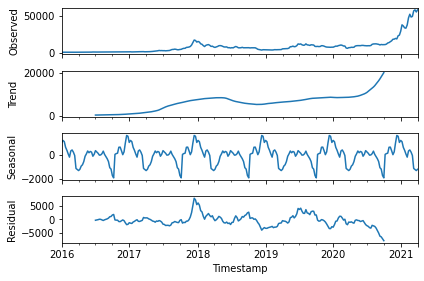

In [ ]:
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(btc.resample("W").median().Weighted_Price).plot()
plt.show()


In [ ]:
dickey = sm.tsa.stattools.adfuller(btc.resample("W").mean().Weighted_Price)


print(f'ADF Statistic: {dickey[0]:.2f}')
print(f'p-value: {dickey[1]:.2f}')
print('Critical Values:')
for key, value in dickey[4].items():
        print(f'\t {key}: {value:.3f}')
        

ADF Statistic: 1.69
p-value: 1.00
Critical Values:
	 1%: -3.455
	 5%: -2.873
	 10%: -2.573


<Figure size 1440x720 with 0 Axes>

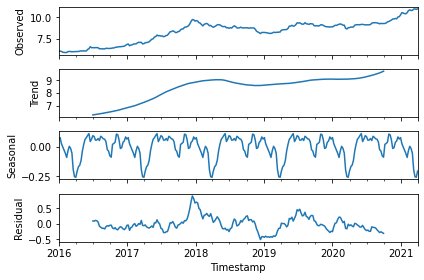

In [ ]:
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(btc.resample("W").median().Weighted_Price_log).plot()
plt.show()


In [ ]:
dickey = sm.tsa.stattools.adfuller(btc.resample("W").mean().Weighted_Price_log)


print(f'ADF Statistic: {dickey[0]:.2f}')
print(f'p-value: {dickey[1]:.2f}')
print('Critical Values:')
for key, value in dickey[4].items():
        print(f'\t {key}: {value:.3f}')
        

ADF Statistic: -0.47
p-value: 0.90
Critical Values:
	 1%: -3.455
	 5%: -2.872
	 10%: -2.572


# Validation


In [ ]:
import datetime

from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit

[]

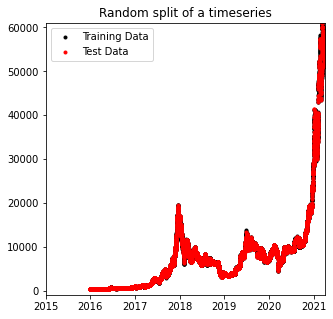

In [ ]:
fig, axs = plt.subplots(figsize=[5, 5])

train, test = train_test_split(btc[["Weighted_Price"]])

axs.plot(train, 'k.', lw=1, label="Training Data")
axs.plot(test,'r.', lw=1, label="Test Data")
axs.set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
axs.set_ylim([-900, 61000])
axs.set_title(f"Random split of a timeseries")
axs.legend()
plt.plot()


## K-Fold Cross-Validation

We can see that the data that is supposed to be "unseen" is sprinkled in between the training data. This does not have anything to do with forecasting anymore and only needs some simple interpolation. We need a better system!

Good machine learning validation is done using cross-validation, where the data is split into multiple subset and tested against each individually. KFold is the most common one that split the data into a number of `k` folds or subsets.

![Cross-Validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
[[Source]](https://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
cv = KFold()
cv

KFold(n_splits=5, random_state=None, shuffle=False)

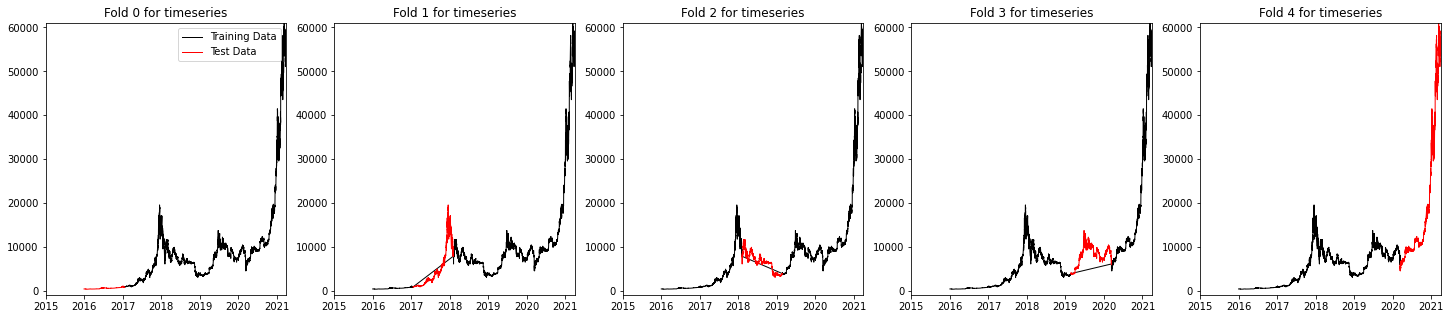

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(cv.split(btc.Weighted_Price)):
    axs[i].plot(btc.Weighted_Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


## Time-Series Cross-Validation

This is better, but still not ideal. Each fold is contained by other data. Due to the time dependency, we know the order of the data and the machine learning system will exploit this information. Therefore, a real time-series solution must be used. This one only uses future data for validation:

![Time Series Split](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png) [[Source]](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split)


Read more in the complimentary ebook [Understanding Machine Learning Validation](https://dramsch.net/books/).


In [ ]:
tscv = TimeSeriesSplit()
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

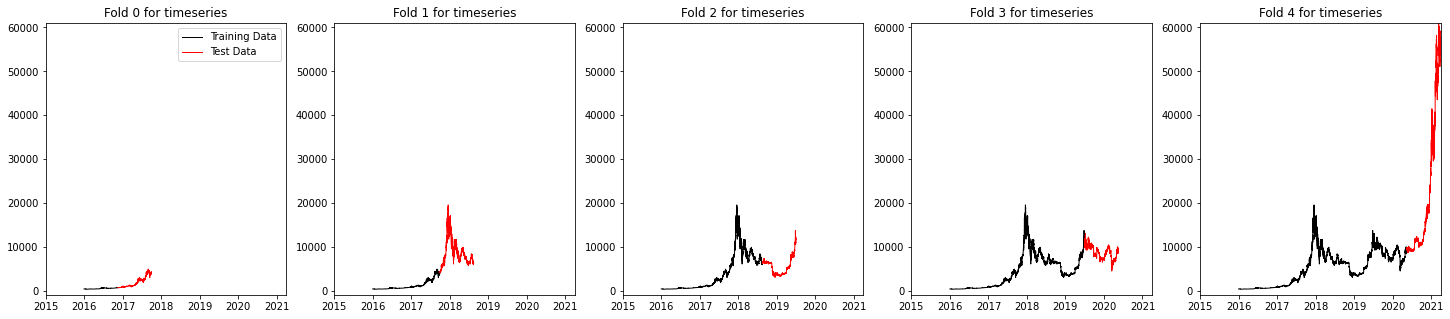

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(tscv.split(btc.Weighted_Price)):
    axs[i].plot(btc.Weighted_Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


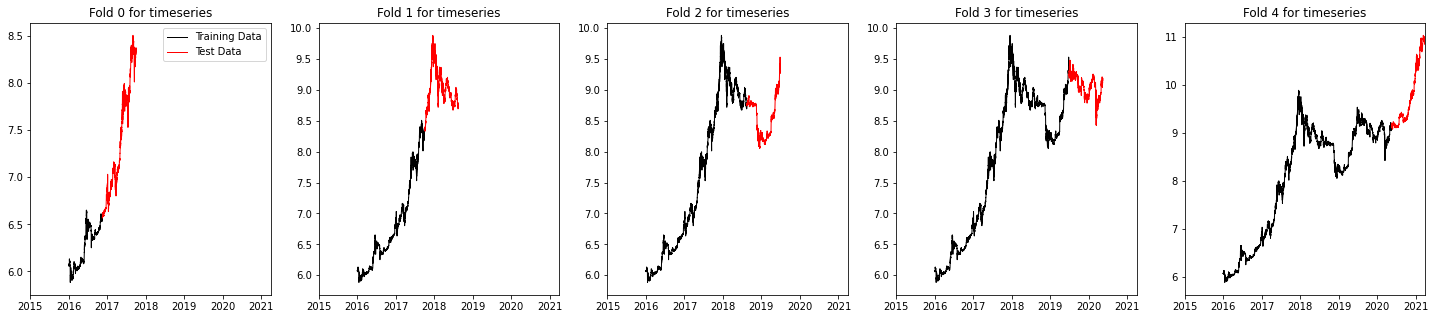

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(tscv.split(btc.Weighted_Price_log)):
    axs[i].plot(btc.Weighted_Price_log[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price_log[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    #axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


# Prepare Training data
## Classic Machine Learning

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
split = int(btc.shape[0]*0.8)
df_train = btc[:split]
df_test = btc[split:]


In [ ]:
def create_dataset(df, n, feature=0):
    x = []
    y = []

    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, feature])
        y.append(df[i, feature])
    x = np.expand_dims(np.array(x), -1)
    y = np.expand_dims(np.array(y), -1)
    return x, y 

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(df_train)
dataset_train


array([[3.81530809e-03, 3.79800935e-03, 3.83970181e-03, ...,
        3.20933416e-04, 3.81898104e-03, 4.64886447e-02],
       [3.75801430e-03, 3.74225976e-03, 3.78588539e-03, ...,
        2.93058223e-04, 3.76559444e-03, 4.58948808e-02],
       [3.78668816e-03, 3.76635174e-03, 3.81947248e-03, ...,
        1.14456949e-04, 3.79322728e-03, 4.62023882e-02],
       ...,
       [2.89704073e-01, 2.90799428e-01, 2.88878243e-01, ...,
        4.81880483e-01, 2.89827257e-01, 7.01222297e-01],
       [2.95280004e-01, 2.96143732e-01, 2.94639652e-01, ...,
        2.56460351e-01, 2.95369174e-01, 7.05675457e-01],
       [2.98075672e-01, 2.98562502e-01, 2.97677301e-01, ...,
        1.31549689e-01, 2.98101832e-01, 7.07842417e-01]])

In [ ]:
dataset_test = scaler.transform(df_test)


In [ ]:
X_train, y_train = create_dataset(dataset_train,50,7)
X_test, y_test = create_dataset(dataset_test,50,7)


In [ ]:
X_train.shape

(36734, 50, 1)

In [ ]:
y_train.shape

(36734, 1)

## Prophet


In [ ]:
df_train.reset_index(inplace=True)
df_prophet = pd.DataFrame(columns=["ds", "y"])
df_prophet["ds"] = df_train.Timestamp
df_prophet["y"] = df_train.Weighted_Price
df_prophet

,ds,y
0,2016-01-01 00:00:00,431.486899
1,2016-01-01 01:00:00,430.461480
2,2016-01-01 02:00:00,430.992236
3,2016-01-01 03:00:00,431.577192
4,2016-01-01 04:00:00,434.306570
...,...,...
36779,2020-03-12 11:00:00,6109.125254
36780,2020-03-12 12:00:00,6049.553068
36781,2020-03-12 13:00:00,5924.966705
36782,2020-03-12 14:00:00,6031.412610


In [ ]:
df_test.reset_index(inplace=True)
df_prophet_test = pd.DataFrame(columns=["ds", "y"])
df_prophet_test["ds"] = df_test.Timestamp
df_prophet_test["y"] = df_test.Weighted_Price
df_prophet_test

,ds,y
0,2020-03-12 16:00:00,6049.065567
1,2020-03-12 17:00:00,6123.254776
2,2020-03-12 18:00:00,6081.036189
3,2020-03-12 19:00:00,6047.960700
4,2020-03-12 20:00:00,5871.514519
...,...,...
9192,2021-03-30 20:00:00,58682.385127
9193,2021-03-30 21:00:00,58705.094588
9194,2021-03-30 22:00:00,58788.454429
9195,2021-03-30 23:00:00,58666.750127


# Evaluation function


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
def evaluate_model(model, model_name="Model", test_data=X_test, target_data=y_test):
    y_pred_test = model.predict(test_data)

    try:
        y_pred_test = y_pred_test.yhat 
    except:
        pass

    test_rs = r2_score(target_data,y_pred_test)
    print('R Squared : ', round(test_rs,5))

    test_MAE = mean_absolute_error(target_data, y_pred_test)
    print('Mean Absolute Error: ', round(test_MAE, 5))

    plt.figure(figsize=(20,10))
    plt.plot(y_pred_test, color='green', marker='o', linestyle='dashed',label='Predicted Price')
    plt.plot(target_data, color='red', label='Actual Price')
    plt.title('Comparison of actual and predicted stock prices for ' + model_name)
    plt.xlabel('Day')
    plt.ylabel('Prices')
    plt.legend()
    plt.show()
    
    return test_rs, test_MAE

# SARIMA

- S: Seasonal
- AR: Auto Regressive model
- I: Integrated
- MA: Moving Average


In [ ]:
sarima = sm.tsa.statespace.SARIMAX(btc.Weighted_Price[:split],
                                   order=(1, 1, 2),
                                   seasonal_order=(1, 1, 2, 12),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)

results = sarima.fit()
print("Time Series AIC: " + str(results.aic))


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


KeyboardInterrupt: ignored

# Facebook Prophet

In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 216 kB 11.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640490 sha256=4ec2c4b30832cb8f21667d1987ee066d375afcae4d60e5ecf57a139c688582e1
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet

In [ ]:
prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
prophet.fit(df_prophet)


In [ ]:
forecast = prophet.predict(df_prophet_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9192,2021-03-30 20:00:00,20182.799985,-38374.471544,70428.215386,-36823.223389,72206.248270,-1827.298259,-1827.298259,-1827.298259,0.374332,0.374332,0.374332,5.186468,5.186468,5.186468,-1832.859058,-1832.859058,-1832.859058,0.0,0.0,0.0,18355.501726
9193,2021-03-30 21:00:00,20183.681106,-38377.889375,70631.360714,-36831.620677,72214.830271,-1823.761164,-1823.761164,-1823.761164,1.881445,1.881445,1.881445,4.863071,4.863071,4.863071,-1830.505680,-1830.505680,-1830.505680,0.0,0.0,0.0,18359.919942
9194,2021-03-30 22:00:00,20184.562227,-38215.320617,70378.617405,-36840.017964,72223.412273,-1819.654633,-1819.654633,-1819.654633,3.921424,3.921424,3.921424,4.573086,4.573086,4.573086,-1828.149143,-1828.149143,-1828.149143,0.0,0.0,0.0,18364.907595
9195,2021-03-30 23:00:00,20185.443348,-38510.927975,70599.010345,-36848.415252,72231.994274,-1815.606183,-1815.606183,-1815.606183,5.868807,5.868807,5.868807,4.314489,4.314489,4.314489,-1825.789479,-1825.789479,-1825.789479,0.0,0.0,0.0,18369.837165
9196,2021-03-31 00:00:00,20186.324469,-38975.609496,70227.937600,-36856.812540,72240.576275,-1812.675955,-1812.675955,-1812.675955,6.666413,6.666413,6.666413,4.084353,4.084353,4.084353,-1823.426722,-1823.426722,-1823.426722,0.0,0.0,0.0,18373.648514


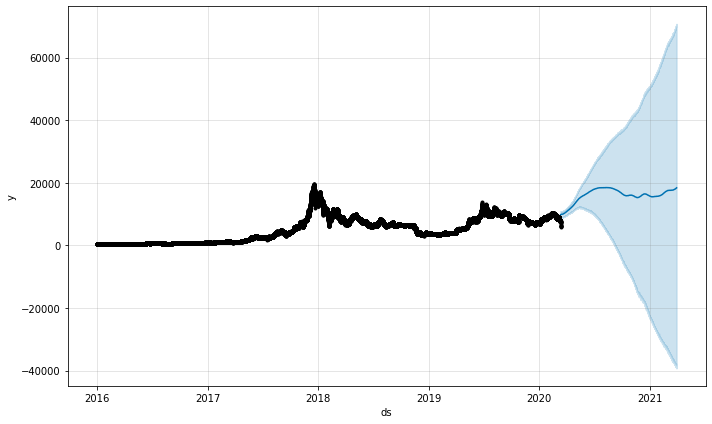

In [ ]:
fig = prophet.plot(forecast)


R Squared :  0.01037
Mean Absolute Error:  10957.6651


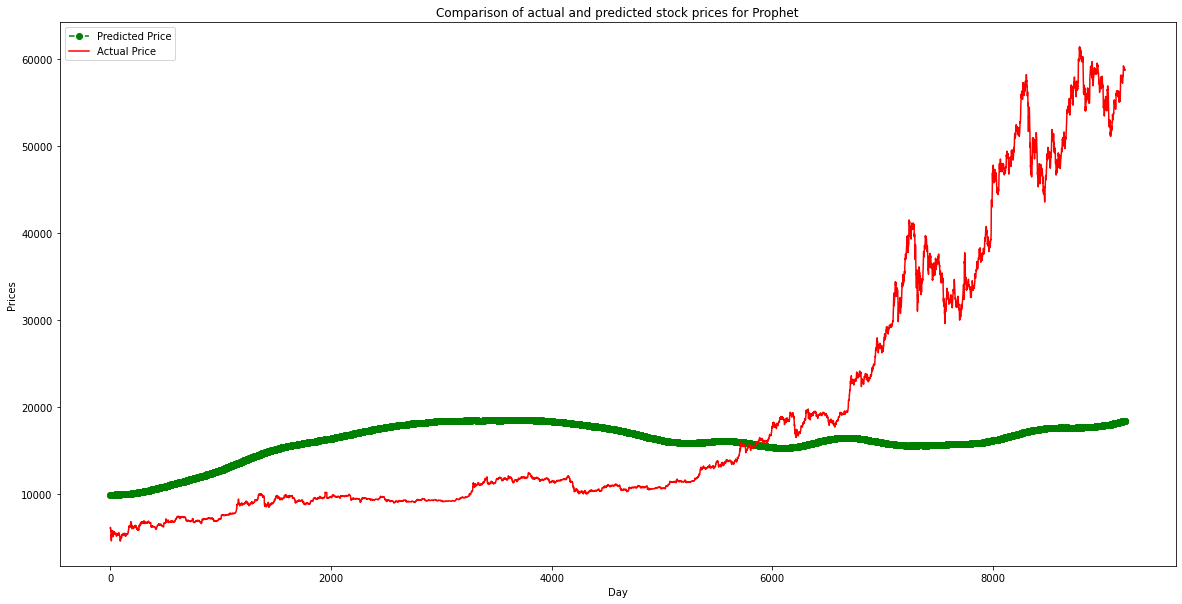

(0.010373250705470793, 10957.665104136673)

In [ ]:
evaluate_model(prophet, "Prophet", df_prophet_test, df_prophet_test.y)

# XGBoost


In [ ]:
import xgboost

In [ ]:
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(np.squeeze(X_train), np.squeeze(y_train))


[01:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

R Squared :  0.60969
Mean Absolute Error:  0.0523


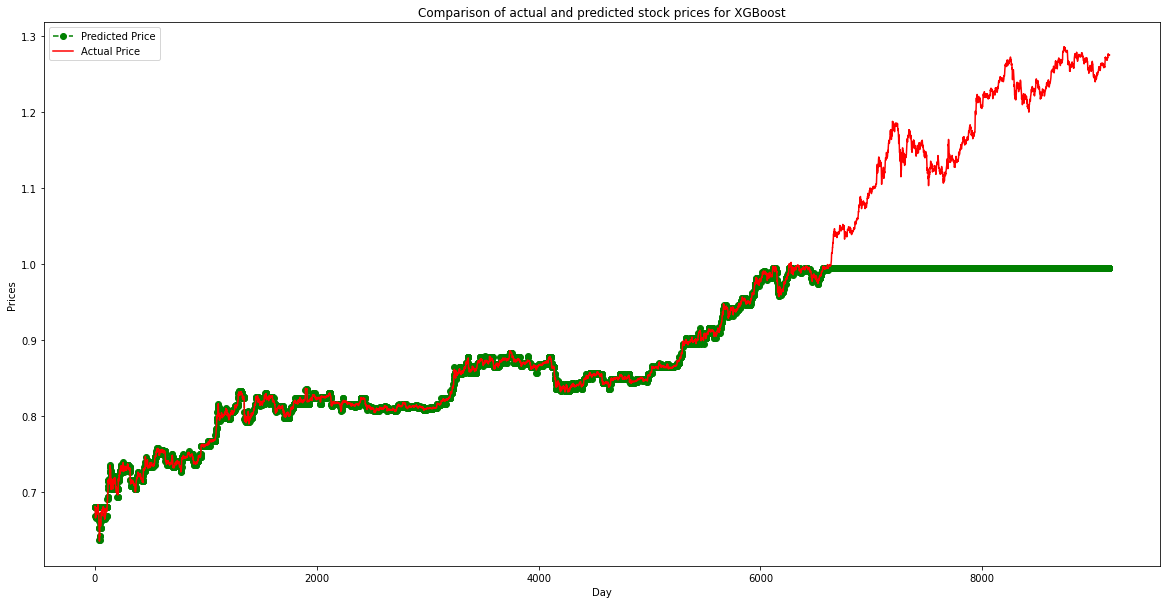

(0.6096859276083624, 0.05229789296474891)

In [ ]:
evaluate_model(xgb_model, model_name="XGBoost", test_data=np.squeeze(X_test), target_data=np.squeeze(y_test))


# LSTM


In [ ]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

In [ ]:
LSTM_Model = Sequential()


In [ ]:
LSTM_Model.add(LSTM(units=96,
                    return_sequences=True,
                    input_shape=(X_train.shape[1], 1)))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96, 
                    return_sequences=True))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96, 
                    return_sequences=True))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(Dense(units=1))

In [ ]:
LSTM_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [ ]:
LSTM_Model.compile(loss=MSE, optimizer=Adam())


In [ ]:
LSTM_Model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.05)

Epoch 1/4
1091/1091 [==============================] - 64s 59ms/step - loss: 5.1417e-04 - val_loss: 7.2595e-05
Epoch 2/4
1091/1091 [==============================] - 64s 59ms/step - loss: 4.8008e-04 - val_loss: 1.9223e-05
Epoch 3/4
1091/1091 [==============================] - 64s 59ms/step - loss: 4.7221e-04 - val_loss: 4.4221e-05
Epoch 4/4
1091/1091 [==============================] - 64s 59ms/step - loss: 4.4815e-04 - val_loss: 3.7327e-05


R Squared :  0.97906
Mean Absolute Error:  0.01648


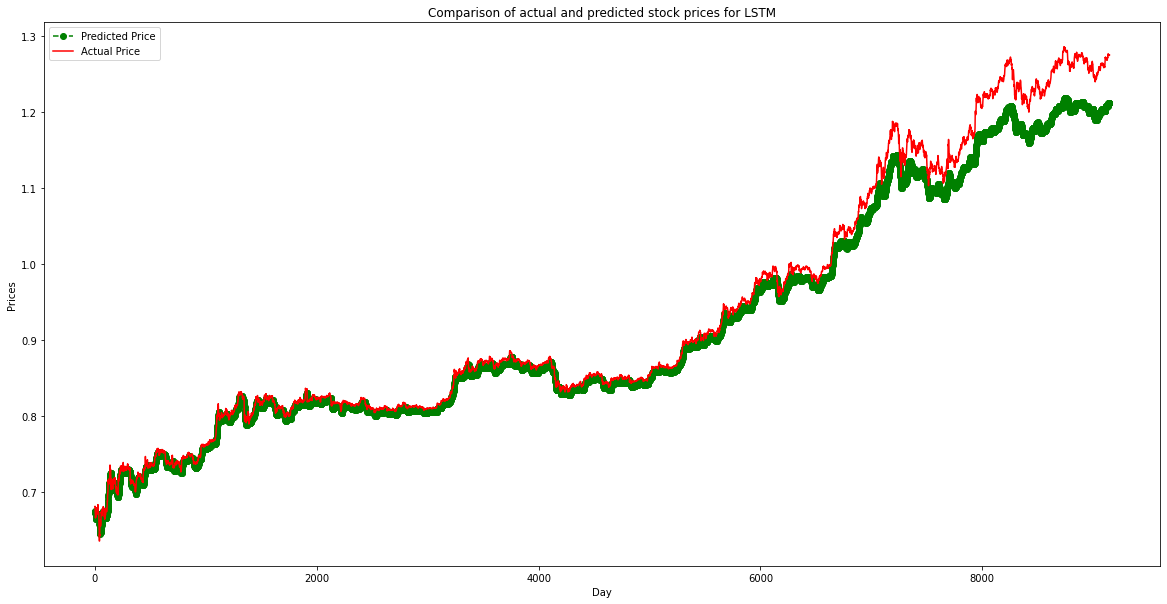

(0.9790565294132377, 0.016482596440854917)

In [ ]:
evaluate_model(LSTM_Model, "LSTM")


# Convolutional Neural Network


In [ ]:
CNN_model=Sequential()

In [ ]:
CNN_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
CNN_model.add(MaxPooling1D(3))
CNN_model.add(Dropout(0.1))
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
CNN_model.add(MaxPooling1D(3))
CNN_model.add(Dropout(0.1))
CNN_model.add(Flatten())
CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dense(1, activation='relu'))


In [ ]:
CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 48, 32)            128       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 16, 32)           0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 32)            0         
                                                                 
 conv1d_8 (Conv1D)           (None, 14, 64)            6208      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 4, 64)            

In [ ]:
CNN_model.compile(optimizer='adam', loss='mse')


In [ ]:
CNN_model.fit(X_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
1034/1034 [==============================] - 6s 5ms/step - loss: 1.1027e-04 - val_loss: 0.0012
Epoch 2/20
1034/1034 [==============================] - 5s 5ms/step - loss: 1.0976e-04 - val_loss: 4.5715e-04
Epoch 3/20
1034/1034 [==============================] - 5s 5ms/step - loss: 1.1093e-04 - val_loss: 0.0013
Epoch 4/20
1034/1034 [==============================] - 5s 5ms/step - loss: 1.0806e-04 - val_loss: 0.0011
Epoch 5/20
1034/1034 [==============================] - 5s 5ms/step - loss: 1.0936e-04 - val_loss: 0.0011
Epoch 6/20
1034/1034 [==============================] - 5s 5ms/step - loss: 1.0633e-04 - val_loss: 6.2697e-04
Epoch 7/20
1034/1034 [==============================] - 5s 5ms/step - loss: 1.0471e-04 - val_loss: 0.0010
Epoch 8/20
1034/1034 [==============================] - 5s 5ms/step - loss: 1.0505e-04 - val_loss: 0.0011
Epoch 9/20
1034/1034 [==============================] - 5s 5ms/step - loss: 1.0363e-04 - val_loss: 8.4884e-04
Epoch 10/20
1034/1034 [===========

R Squared :  0.77924
Mean Absolute Error:  0.07007


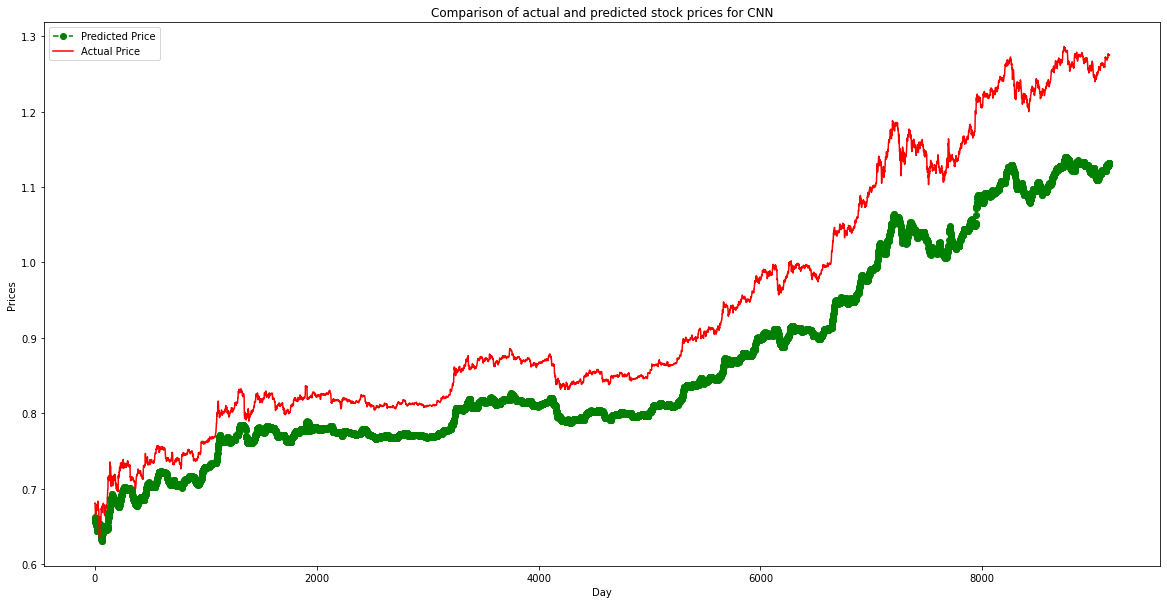

(0.779238046917645, 0.07006642091870567)

In [ ]:
evaluate_model(CNN_model, "CNN")


# Neural Prophet


In [ ]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 2.9 MB/s 
     |████████████████████████████████| 155 kB 11.2 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
neuralprophet = NeuralProphet()
neuralprophet.fit(df_prophet, freq="H")


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 74
INFO:NP.config:Auto-set epochs to 74


  0%|          | 0/328 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.82E-02, min: 1.26E+00
INFO:NP.utils_torch:lr-range-test results: steep: 2.82E-02, min: 1.26E+00


  0%|          | 0/328 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.82E-02, min: 1.26E+00
INFO:NP.utils_torch:lr-range-test results: steep: 2.82E-02, min: 1.26E+00


  0%|          | 0/328 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.82E-02, min: 1.04E+00
INFO:NP.utils_torch:lr-range-test results: steep: 2.82E-02, min: 1.04E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.82E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 2.82E-02
Epoch[74/74]: 100%|██████████| 74/74 [01:47<00:00,  1.46s/it, SmoothL1Loss=0.00498, MAE=715, RMSE=1.07e+3, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,1.001903,15658.288993,18921.292170,0.0
1,0.519704,9920.598724,12119.619362,0.0
2,0.125282,4332.784216,5374.407820,0.0
3,0.043083,2377.927733,3166.371948,0.0
4,0.026553,1856.317829,2489.366940,0.0
...,...,...,...,...
69,0.005026,717.583337,1071.300137,0.0
70,0.005009,717.293488,1068.178531,0.0
71,0.005001,720.106325,1067.827578,0.0
72,0.004989,714.361859,1065.327848,0.0


In [ ]:
neural_forecast = neuralprophet.predict(df_prophet_test)
neural_forecast.tail()


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
9192,2021-03-30 20:00:00,58682.385127,6423.569824,-52258.815302,7789.917969,-1364.725586,6.929608,-8.552321
9193,2021-03-30 21:00:00,58705.094588,6423.422363,-52281.672224,7789.834473,-1365.086914,6.411692,-7.737144
9194,2021-03-30 22:00:00,58788.454429,6432.205566,-52356.248863,7789.750977,-1365.440430,5.958612,1.936261
9195,2021-03-30 23:00:00,58666.750127,6440.169922,-52226.580205,7789.666992,-1365.787109,5.569597,10.720354
9196,2021-03-31 00:00:00,58764.349363,6440.099121,-52324.250242,7789.583984,-1366.126221,5.242504,11.399044


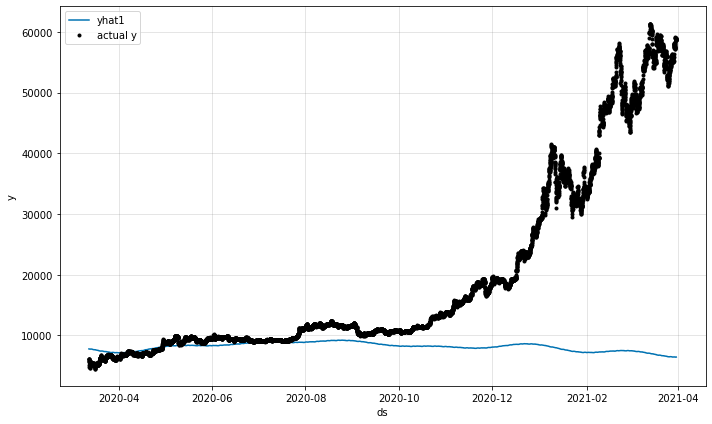

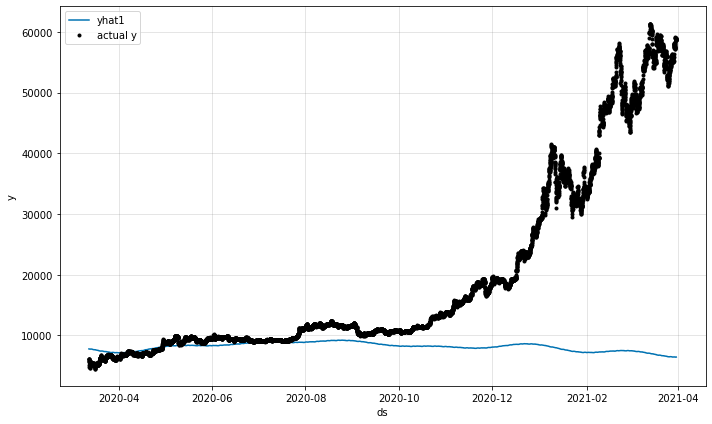

In [ ]:
neuralprophet.plot(neural_forecast)


R Squared :  0.01037
Mean Absolute Error:  10957.6651


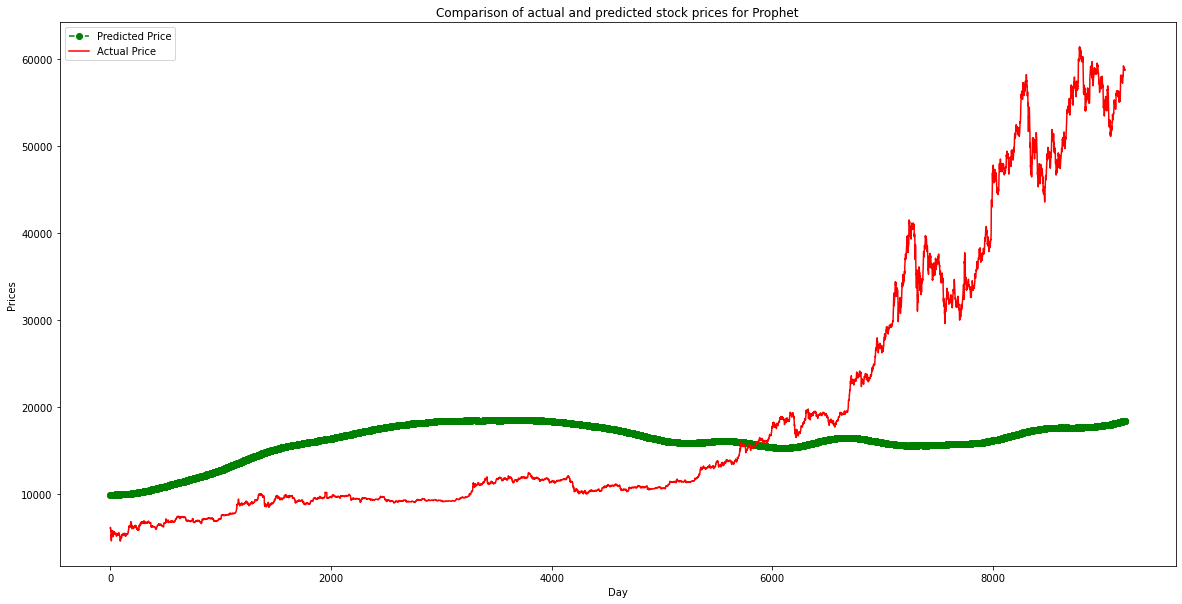

(0.010373250705470793, 10957.665104136673)

In [ ]:
evaluate_model(prophet, "Prophet", df_prophet_test, df_prophet_test.y)